# Smart Urban Heatmap API

This document refers to the Open Data API of the [Smart Urban Heatmap Bern Project](https://urban-heat.meteotest.io/eigerplatz-bern), which provides live as well as historical temperature and humidity data from a sensor network in Bern and periphery.  
Further information on the API, including the [interactive OpenAPI specification](https://jurekmueller.github.io/SUH_Bern_API_Doc/Swagger/), can be found in the [API documentation](https://jurekmueller.github.io/SUH_Bern_API_Doc/).

**Licensing Information**  
This data is available under the [Creative Commons Attribution License (CC-BY)](https://creativecommons.org/licenses/by/4.0/).  
Please ensure that you provide proper attribution when using or redistributing this data in your projects or applications.  
Attribution Example: Data provided by the Smart Urban Heatmap Project for Bern, Switzerland.


**Disclaimer Temperature Bias:**

## Introduction

This is an **interactive python notebook** demonstrating step by step how data from the API endpoint (https://urban-heat.meteotest.io/api/1.0/) can be requested via http requests and visualized.   

The notebook can be run **locally or directly in the browser** using [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/JurekMueller/SUH_Bern_API_Doc/main?labpath=python_examples.ipynb)
or [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JurekMueller/SUH_Bern_API_Doc/blob/main/python_examples.ipynb).

To use the notebook simply execute each code cell one after the other, for example by selecting and pressing **CTRL + ENTER**. The code in the cells can be adapted and expanded to test different outcomes.

The rest of the notebook is organized as follows:
1. [Package Import](#package-import)
2. [HTTP Request](#http-request)
3. [Current Weather Map](#current-weather-map)
4. [Station Timeseries](#station-timeseries)


## Package Import

First we import the python modules that we need

In [1]:
import io # for working with streams (like strings)
import requests # for making standard http requests
import pandas as pd # for storing and manipulating data
import geopandas as gpd # for storing and manipulating geographic data
import folium # for creating maps
import branca # for using colorscales in folium

## HTTP Request

An http request can be made using the requests module. Simply by providing the desired endpoint.  
In our case we want to start by making a GET request to the stations data from the API endpoint https://urban-heat.meteotest.io/api/1.0/stations.

In [2]:
# Define the URL
url = "https://urban-heat.meteotest.io/api/1.0/stations"

# Make the GET request
response = requests.get(url)
response

<Response [200]>

The response object contains the status code of the request. A status code of 200 means that the request was successful.   
The payload of the response can be accessed through the ``text`` property.

In [3]:
# show only the first 1000 characters of the response
response.text

'{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "Point", "coordinates": [46.93798, 7.45656]}, "properties": {"locationId": "D03FCBFEFFE70FFE", "name": "D\\u00e4hlh\\u00f6lzliwald-Bern", "altitude": 542, "dateObserved": "2023-09-09T09:41:17Z", "temperature": 24.714275, "relativeHumidity": 64.42802}}, {"type": "Feature", "geometry": {"type": "Point", "coordinates": [46.946472, 7.4311438]}, "properties": {"locationId": "9FD350FEFF6E959E", "name": "Monbijour-Bern", "altitude": 542, "dateObserved": "2023-09-09T09:41:16Z", "temperature": 26.823835, "relativeHumidity": 54.265507}}, {"type": "Feature", "geometry": {"type": "Point", "coordinates": [46.935593, 7.507427]}, "properties": {"locationId": "B3C450FEFF6E959E", "name": "Dorfstrasse-Muri", "altitude": 542, "dateObserved": "2023-09-09T09:41:14Z", "temperature": 26.986725, "relativeHumidity": 56.56771}}, {"type": "Feature", "geometry": {"type": "Point", "coordinates": [46.928406, 7.475974]}, "properties

We see that this API endpoint by default returns a ``geojson`` format, which includes geoinformation and properties of the stations.

## Current Weather Map

### Geopandas DataFrame

To work with geodata in python we use the [GeoPandas](https://geopandas.org/en/stable/) module. We can create a geopandas dataframe from the ``GeoJSON`` similar to reading a file.  
Additionally we can check if the request was successful and otherwise print an error message.  
All together we get:

In [4]:
# Define the URL
url = "https://urban-heat.meteotest.io/api/1.0/stations"

# Make the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read GeoJSON content directly into geopandas DataFrame
    stations = gpd.read_file(response.text)
else:
    print(f"Request failed with status code: {response.status_code}")

#display stations DataFrame
stations

,locationId,name,altitude,dateObserved,temperature,relativeHumidity,geometry
0,D03FCBFEFFE70FFE,Dählhölzliwald-Bern,542,2023-09-09 09:41:17+00:00,24.714275,64.428020,POINT (46.93798 7.45656)
1,9FD350FEFF6E959E,Monbijour-Bern,542,2023-09-09 09:41:16+00:00,26.823835,54.265507,POINT (46.94647 7.43114)
2,B3C450FEFF6E959E,Dorfstrasse-Muri,542,2023-09-09 09:41:14+00:00,26.986725,56.567710,POINT (46.93559 7.50743)
3,61E350FEFF6E959E,Gurtenweg-Muri,542,2023-09-09 09:41:11+00:00,28.874647,51.078278,POINT (46.92841 7.47597)
4,3B40CBFEFFE70FFE,Rütti-Zollikofen-2,542,2023-09-09 09:41:05+00:00,26.190968,58.396890,POINT (46.99079 7.46407)
...,...,...,...,...,...,...,...
110,450551FEFF6E959E,Engestrasse-Bern-2,542,2023-09-09 09:31:29+00:00,25.170900,64.717930,POINT (46.96286 7.44009)
111,4840CBFEFFE70FFE,Riedlisacker-Belp,542,2023-09-09 09:31:28+00:00,25.429922,66.726400,POINT (46.89942 7.51184)
112,DE0451FEFF6E959E,Melchiorstrasse-Bern-5,542,2023-09-09 09:31:22+00:00,24.166857,61.441063,POINT (46.95218 7.38914)
113,D83FCBFEFFE70FFE,Felshaldenweg-Bern,542,2023-09-09 09:28:31+00:00,27.446022,55.398490,POINT (46.97417 7.44122)


We see that the data is now neatly organized into a table, with the geoinformation stored in the collumn ``geometry``.

Vizualizing geoinformation on a map using python can be easily achieved using the module [folium](https://github.com/python-visualization/folium), which is a python wrapper for the javascript libary [Leaflet.js](https://leafletjs.com/).

First lets create a map.

### Map with Folium

In [5]:
# Create a base map
m = folium.Map(location=[stations.geometry.x.mean(), stations.geometry.y.mean()], zoom_start=13)

#display map
m

We see that the map is already centered on Bern. This is because we have set the center point of the map based on the station data by calculating the mean lon and mean lat coordinates `stations.geometry.x.mean()` and `stations.geometry.y.mean()` which use the data analysis capabilities of geopandas.

Now lets add markers for each station.

In [6]:
# Create a base map
m = folium.Map(location=[stations.geometry.x.mean(), stations.geometry.y.mean()], zoom_start=13)#, tiles="CartoDB positron")

# Iterate through each station the GeoDataFrame and create a circle for each point
for idx, station in stations.iterrows():
    # Create a circle marker for each station and add it to the map
    folium.CircleMarker(
        # Location of the marker in lon and lat
        location=(station.geometry.x, station.geometry.y),
        # Styling the marker
        radius=5,
        color="black",  # Border color
        weight=0.5,  # Border width
        fill=True,
        fill_color="black",
        fill_opacity=1, # 1 means 100% opaque
        # Add a tooltip with station name
        tooltip=f"{station['name']}",
    ).add_to(m)

m

Now we see where on the the stations are located. We also added a tooltip that shows the stations name on mouseover.

The stations data also includes the current temperature and humidity measured at the stations.  
If we want a similar visualization as on the [project website](https://urban-heat.meteotest.io/) we thus need to adjust the color of the station markers according to the current temperature.  
For this we use the module [branca](https://github.com/python-visualization/branca) which allows to use colormaps in combination with Folium.  
We choose a predefined colormap that intuitively represent the difference between warm and cold.

In [7]:
# Create a base map
m = folium.Map(location=[stations.geometry.x.mean(), stations.geometry.y.mean()], zoom_start=13)#, tiles="CartoDB positron")

# Most popular colormaps are sequential, meaning that they have a start and end color
# Define a function to reverse a colormap
def reversed_colormap(existing):
    return branca.colormap.LinearColormap(
        colors=list(reversed(existing.colors)),
        vmin=existing.vmin, vmax=existing.vmax
    )

# Create a colormap for our temperature range of 15-37°C
# Choose an appropriate colormap (Spectral_04) and reverse it so that it goes from blue (cold) to red (hot)
colormap = reversed_colormap(branca.colormap.linear.Spectral_04)
# Scale the colormap to the temperature range and discretize it into 9 steps for better vizibility
colormap = colormap.scale(15, 37).to_step(9) 
# Add a caption to the colormap
colormap.caption = "Temperature (°C)"
# Add colormap to the map
colormap.add_to(m)

# Add colormap to the map
colormap.add_to(m)

# Iterate through each station the GeoDataFrame and create a circle for each point
for idx, station in stations.iterrows():
    # Create a circle marker for each station and add it to the map
    folium.CircleMarker(
        # Location of the marker in lon and lat
        location=(station.geometry.x, station.geometry.y),
        # Styling the marker
        radius=5,
        color="black",  # Border color
        weight=0.5,  # Border width
        fill=True,
        # Set the fill color to the colormap value corresponding to the station temperature
        fill_color=colormap(station['temperature']),
        fill_opacity=1, # 1 means 100% opaque
        # Add a tooltip with station name and temperature
        tooltip=f"{station['name']}: {station['temperature']:.2f}°C",
    ).add_to(m)

m

We now have a map showing the current temperature measured at the stations, including temperature information in the tooltips. 

**Exercise**: Adjust the code above so that it shows relative humidity instead of temperature.

## Station Timeseries

To request and visualize historical data for a given station we can use the API endpoint https://urban-heat.meteotest.io/api/1.0/timeseries.  
This endpoints takes the locationID as an request argument and returns a timeseries which by default covers the last 24 hours. Lets request the data for the station named 'Kornhausplatz-Bern.

In [8]:
# Get the station id from the based on its name from the stations DataFrame
locationId = stations[stations["name"] == "Kornhausplatz-Bern"].locationId.values[0]
# Define the URL including the locationId argument
url = f"https://urban-heat.meteotest.io/api/1.0/timeseries?locationId={locationId}"

# Make the GET request
response = requests.get(url)
response

<Response [200]>

In [9]:
# display response payload
response.text

'{"locationId": "D33FCBFEFFE70FFE", "values": [{"dateObserved": "2023-09-08T16:55:31Z", "temperature": 29.072252, "relativeHumidity": 43.27138}, {"dateObserved": "2023-09-08T17:05:31Z", "temperature": 29.088274, "relativeHumidity": 42.619057}, {"dateObserved": "2023-09-08T17:15:31Z", "temperature": 28.869307, "relativeHumidity": 43.464027}, {"dateObserved": "2023-09-08T17:25:31Z", "temperature": 28.717098, "relativeHumidity": 43.303806}, {"dateObserved": "2023-09-08T17:35:31Z", "temperature": 28.42336, "relativeHumidity": 45.140614}, {"dateObserved": "2023-09-08T17:45:31Z", "temperature": 28.140306, "relativeHumidity": 49.094604}, {"dateObserved": "2023-09-08T17:55:31Z", "temperature": 27.739758, "relativeHumidity": 51.082092}, {"dateObserved": "2023-09-08T18:05:31Z", "temperature": 27.510109, "relativeHumidity": 52.558403}, {"dateObserved": "2023-09-08T18:15:31Z", "temperature": 27.293812, "relativeHumidity": 53.489204}, {"dateObserved": "2023-09-08T18:25:31Z", "temperature": 26.98405

To handle timeseries data without geo information we use the [pandas](https://pandas.pydata.org/) module.  
For an easier read in of the data by `pandas` we can request the endpoint to return the data not in the default `JSON` format but as a `csv`.  
For that we have to add `"Accept": "text/csv"` to the request header.

In [10]:
# Get the station id from the based on its name from the stations DataFrame
locationId = stations[stations["name"] == "Kornhausplatz-Bern"].locationId.values[0]
# Define the URL including the locationId argument
url = f"https://urban-heat.meteotest.io/api/1.0/timeseries?locationId={locationId}"
# Define the headers to request CSV data as a python dictionary
headers = {
    "Accept": "text/csv"
}

# Make the GET request with the headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Read CSV content directly into pandas DataFrame
    # Use io.StringIO to convert the response text into a stream which simulates a file
    timeseries = pd.read_csv(io.StringIO(response.text), delimiter=";")
else:
    print(f"Request failed with status code: {response.status_code}")

# temporary fix for csv structure
timeseries = timeseries.drop(columns=["Unit"]).pivot(index='Time', columns='Parameter', values='Value').reset_index()

#display timeseries DataFrame
timeseries

Parameter,Time,relativeHumidity,temperature
0,2023-09-08T16:55Z,43.271380,29.072252
1,2023-09-08T17:05Z,42.619057,29.088274
2,2023-09-08T17:15Z,43.464027,28.869307
3,2023-09-08T17:25Z,43.303806,28.717098
4,2023-09-08T17:35Z,45.140614,28.423360
...,...,...,...
94,2023-09-09T08:35Z,68.496450,23.285648
95,2023-09-09T08:45Z,66.734030,23.974594
96,2023-09-09T08:55Z,65.179520,24.396505
97,2023-09-09T09:15Z,61.700466,25.472649


We see that the timeseries includes both temperature and humidity values.

The temperature timeseries can now easily be visualized using the pandas plot functionalities.

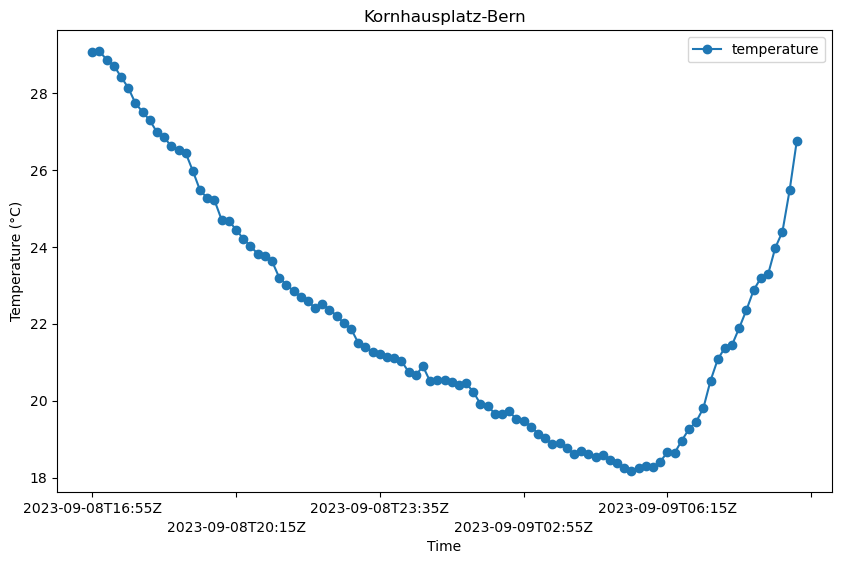

In [11]:
# Use the dataframe plot function to plot the temperature timeseries as a line plot with markers
ax = timeseries.plot(x='Time', y='temperature', figsize=(10,6), marker='o', linestyle='-')
# the ax object is a matplotlib axis object which we can use to further customize the plot

# Add a title
ax.set_title('Kornhausplatz-Bern')

# Add labels for the x and y axis
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')

# Shift x-labels for better visibility
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 0:  # Check if it's an odd tick
        label.set_y(-0.04)

We can easily add relative humidity to the plot by creating a second y-axis using the `twinx()` function.

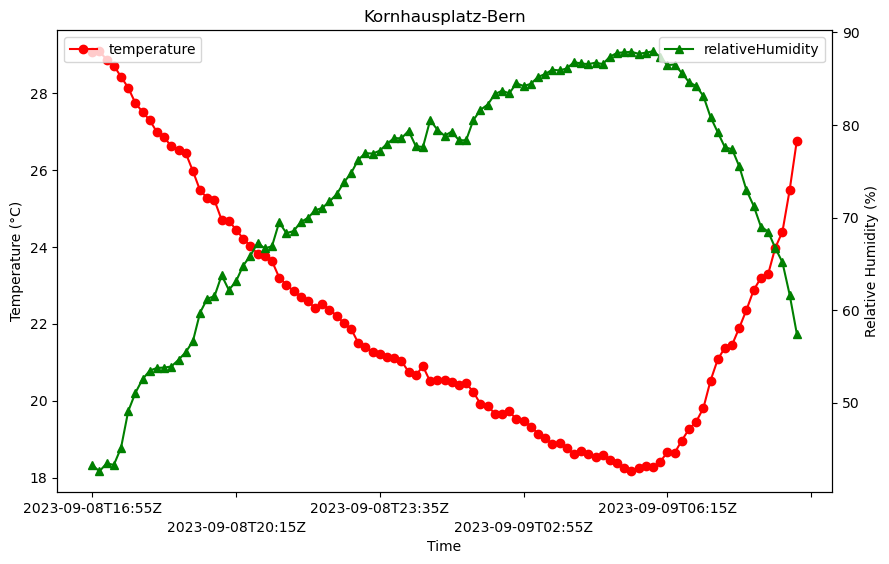

In [12]:
# Use the dataframe plot function to plot the temperature timeseries as a line plot with markers
ax = timeseries.plot(x='Time', y='temperature', figsize=(10,6), marker='o', color='red', linestyle='-')
# the ax object is a matplotlib axis object which we can use to further customize the plot

# Create a second y-axis for relative humidity
ax2 = ax.twinx()
# Plot relative humidity on the second y-axis by specifying the ax object
timeseries.plot(x='Time', y='relativeHumidity', ax=ax2, color='green', marker='^', linestyle='-')

# Add a title
ax.set_title('Kornhausplatz-Bern')

# Add labels for the x and y axis
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax2.set_ylabel('Relative Humidity (%)')

# adjust positions of legends to match positions of y-axes
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Shift x-labels for better visibility
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 0:  # Check if it's an odd tick
        label.set_y(-0.04)

### Custom Time Range

From the timeseries endpoint we can request not only data of the last 24 hours, but from a time period of our choice.  
For that we have to specify the ``timeFrom`` and ``timeTo`` parameters in the http request.  
As described in the [OpenAPI specification](https://jurekmueller.github.io/SUH_Bern_API_Doc/Swagger/) this can be done through relative or absolute time strings.  
Lets request and plot temperature and relative humidity over August 2023:

In [13]:
# Get the station id from the based on its name from the stations DataFrame
locationId = stations[stations["name"] == "Kornhausplatz-Bern"].locationId.values[0]
# Specify start and end time as ISO 8601 formatted strings
startTime = "2023-08-01T00:00:00Z" # 01.08.23 00:00 ; Z means UTC time
endTime = "2023-08-31T23:00:00Z" # 31.08.23 23:00
# Define the URL including the locationId argument
url = f"https://urban-heat.meteotest.io/api/1.0/timeseries?locationId={locationId}&timeFrom={startTime}&timeTo={endTime}"
# Define the headers to request CSV data as a python dictionary
headers = {
    "Accept": "text/csv"
}

# Make the GET request with the headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Read CSV content directly into pandas DataFrame
    # Use io.StringIO to convert the response text into a stream which simulates a file
    timeseries = pd.read_csv(io.StringIO(response.text), delimiter=";")
else:
    print(f"Request failed with status code: {response.status_code}")

# temporary fix for csv structure
timeseries = timeseries.drop(columns=["Unit"]).pivot(index='Time', columns='Parameter', values='Value').reset_index()
timeseries

Parameter,Time


In [14]:
# Use the dataframe plot function to plot the temperature timeseries as a line plot with markers
ax = timeseries.plot(x='Time', y='temperature', figsize=(10,6), marker='o', color='red', linestyle='-')
# the ax object is a matplotlib axis object which we can use to further customize the plot

# Create a second y-axis for relative humidity
ax2 = ax.twinx()
# Plot relative humidity on the second y-axis by specifying the ax object
timeseries.plot(x='Time', y='relativeHumidity', ax=ax2, color='green', marker='^', linestyle='-')

# Add a title
ax.set_title('Kornhausplatz-Bern')

# Add labels for the x and y axis
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax2.set_ylabel('Relative Humidity (%)')

# adjust positions of legends to match positions of y-axes
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Shift x-labels for better visibility
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 0:  # Check if it's an odd tick
        label.set_y(-0.04)

KeyError: 'temperature'

**Exercise:** Adapt the above code using relative time strings so that data from the past three days is show. 